In [1]:
import numpy as np
import pandas as pd

In [2]:
from utils import get_range, get_metrics
from models import NaiveSharpe

In [3]:
# Past date ranges (months)
past_start_dates = [f"2023-01-" + str(idx).zfill(2) for idx in range(1, 30)]
past_end_dates = [f"2024-01-" + str(idx).zfill(2) for idx in range(1, 30)]

num_plots = len(past_start_dates)

In [4]:
# Load in the full price dataframes
price_df = pd.read_pickle("./spx-past-3-years/spx_past_3_years")
index_price_df = pd.read_pickle("./spx-past-3-years/spx_index_past_3_years")

In [5]:
weights = []
stocks = []

for idx in range(num_plots):

     # Get prices for selected date ranges
    past_price_df = get_range(past_start_dates[idx], past_end_dates[idx], price_df)
    past_spx_df = get_range(past_start_dates[idx], past_end_dates[idx], index_price_df)

    # Join stocks and index dataframes
    past_price_df = pd.concat([past_price_df, past_spx_df], axis=1)

    # Get metrics for past price history
    daily_returns, daily_log_returns, \
    annualised_returns, annualised_log_returns, \
    top_n_stocks, covariance_matrix = get_metrics(past_price_df, n=30, show=False)

    naive_model = NaiveSharpe(annualised_log_returns, top_n_stocks, covariance_matrix)
    naive_model.optimise(show_results=False, plot_weights=False)

    weights.append(naive_model.unhedged_weights)
    stocks.append(naive_model.top_n_stocks)

c:\Users\zeyuan\OneDrive\Desktop\qrt-paper-trading\spx\utils.py:39: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = price_df.pct_change()
c:\Users\zeyuan\OneDrive\Desktop\qrt-paper-trading\spx\utils.py:39: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = price_df.pct_change()
c:\Users\zeyuan\OneDrive\Desktop\qrt-paper-trading\spx\utils.py:39: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' t

### This makes a plot of significant portfolio weights over each range

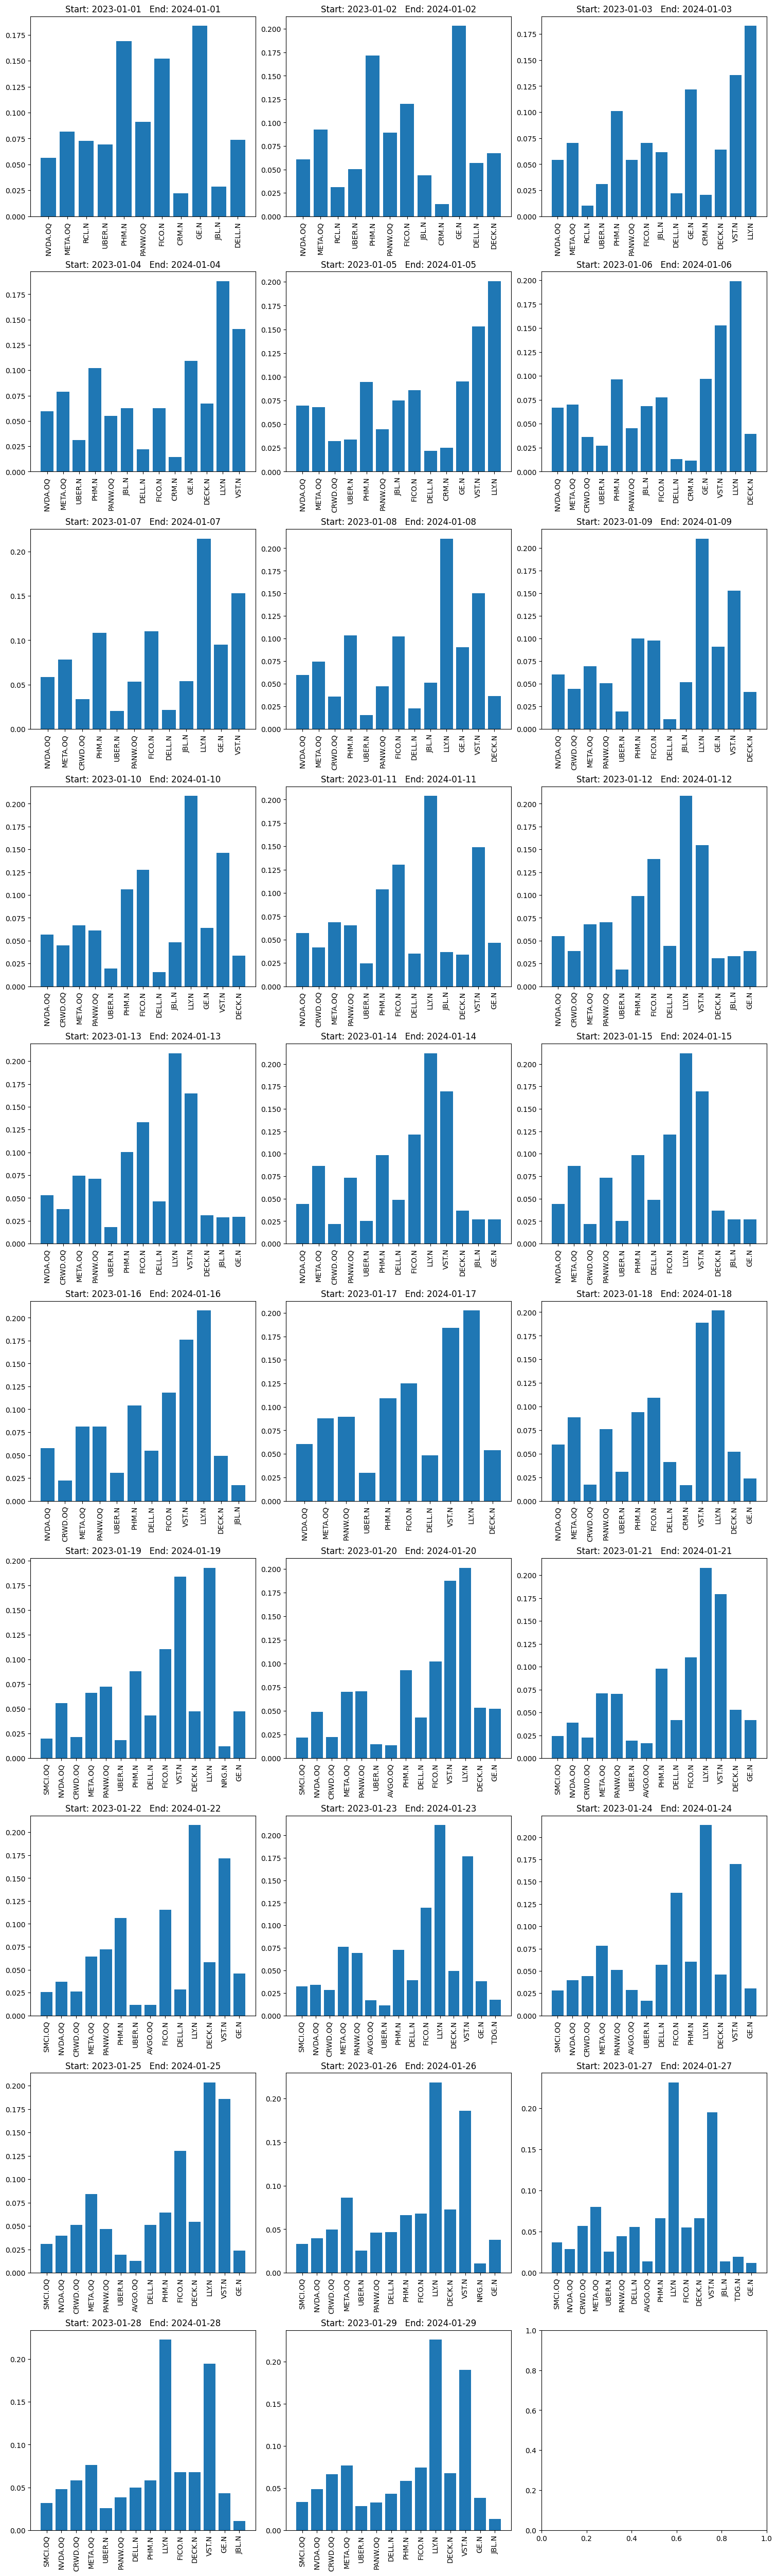

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10, 3, layout="constrained")
fig.set_size_inches(15, 50)

for idx in range(num_plots):
    # print("Start: ", past_start_dates[idx], " "*3, "End: ", past_end_dates[idx])

    title = "Start: " + past_start_dates[idx] + " "*3 + "End: " + past_end_dates[idx]
    axs[idx//3, idx%3].set_title(title)

    # Plot only stocks with a significant weight
    stocks_to_plot = []
    weights_to_plot = []
    for num, weight in enumerate(weights[idx]):
        if weight >= 0.01:  # threshold
            stocks_to_plot.append(stocks[idx][num])
            weights_to_plot.append(weight)

    #plt.bar(stocks_to_plot, weights_to_plot)
    #plt.tick_params(axis='x', labelrotation=90)
    #plt.show()

    axs[idx//3, idx%3].bar(stocks_to_plot, weights_to_plot)
    axs[idx//3, idx%3].tick_params(axis='x', labelrotation=90)

plt.show()

### This makes a plot for the portfolio weights for each stock over each range

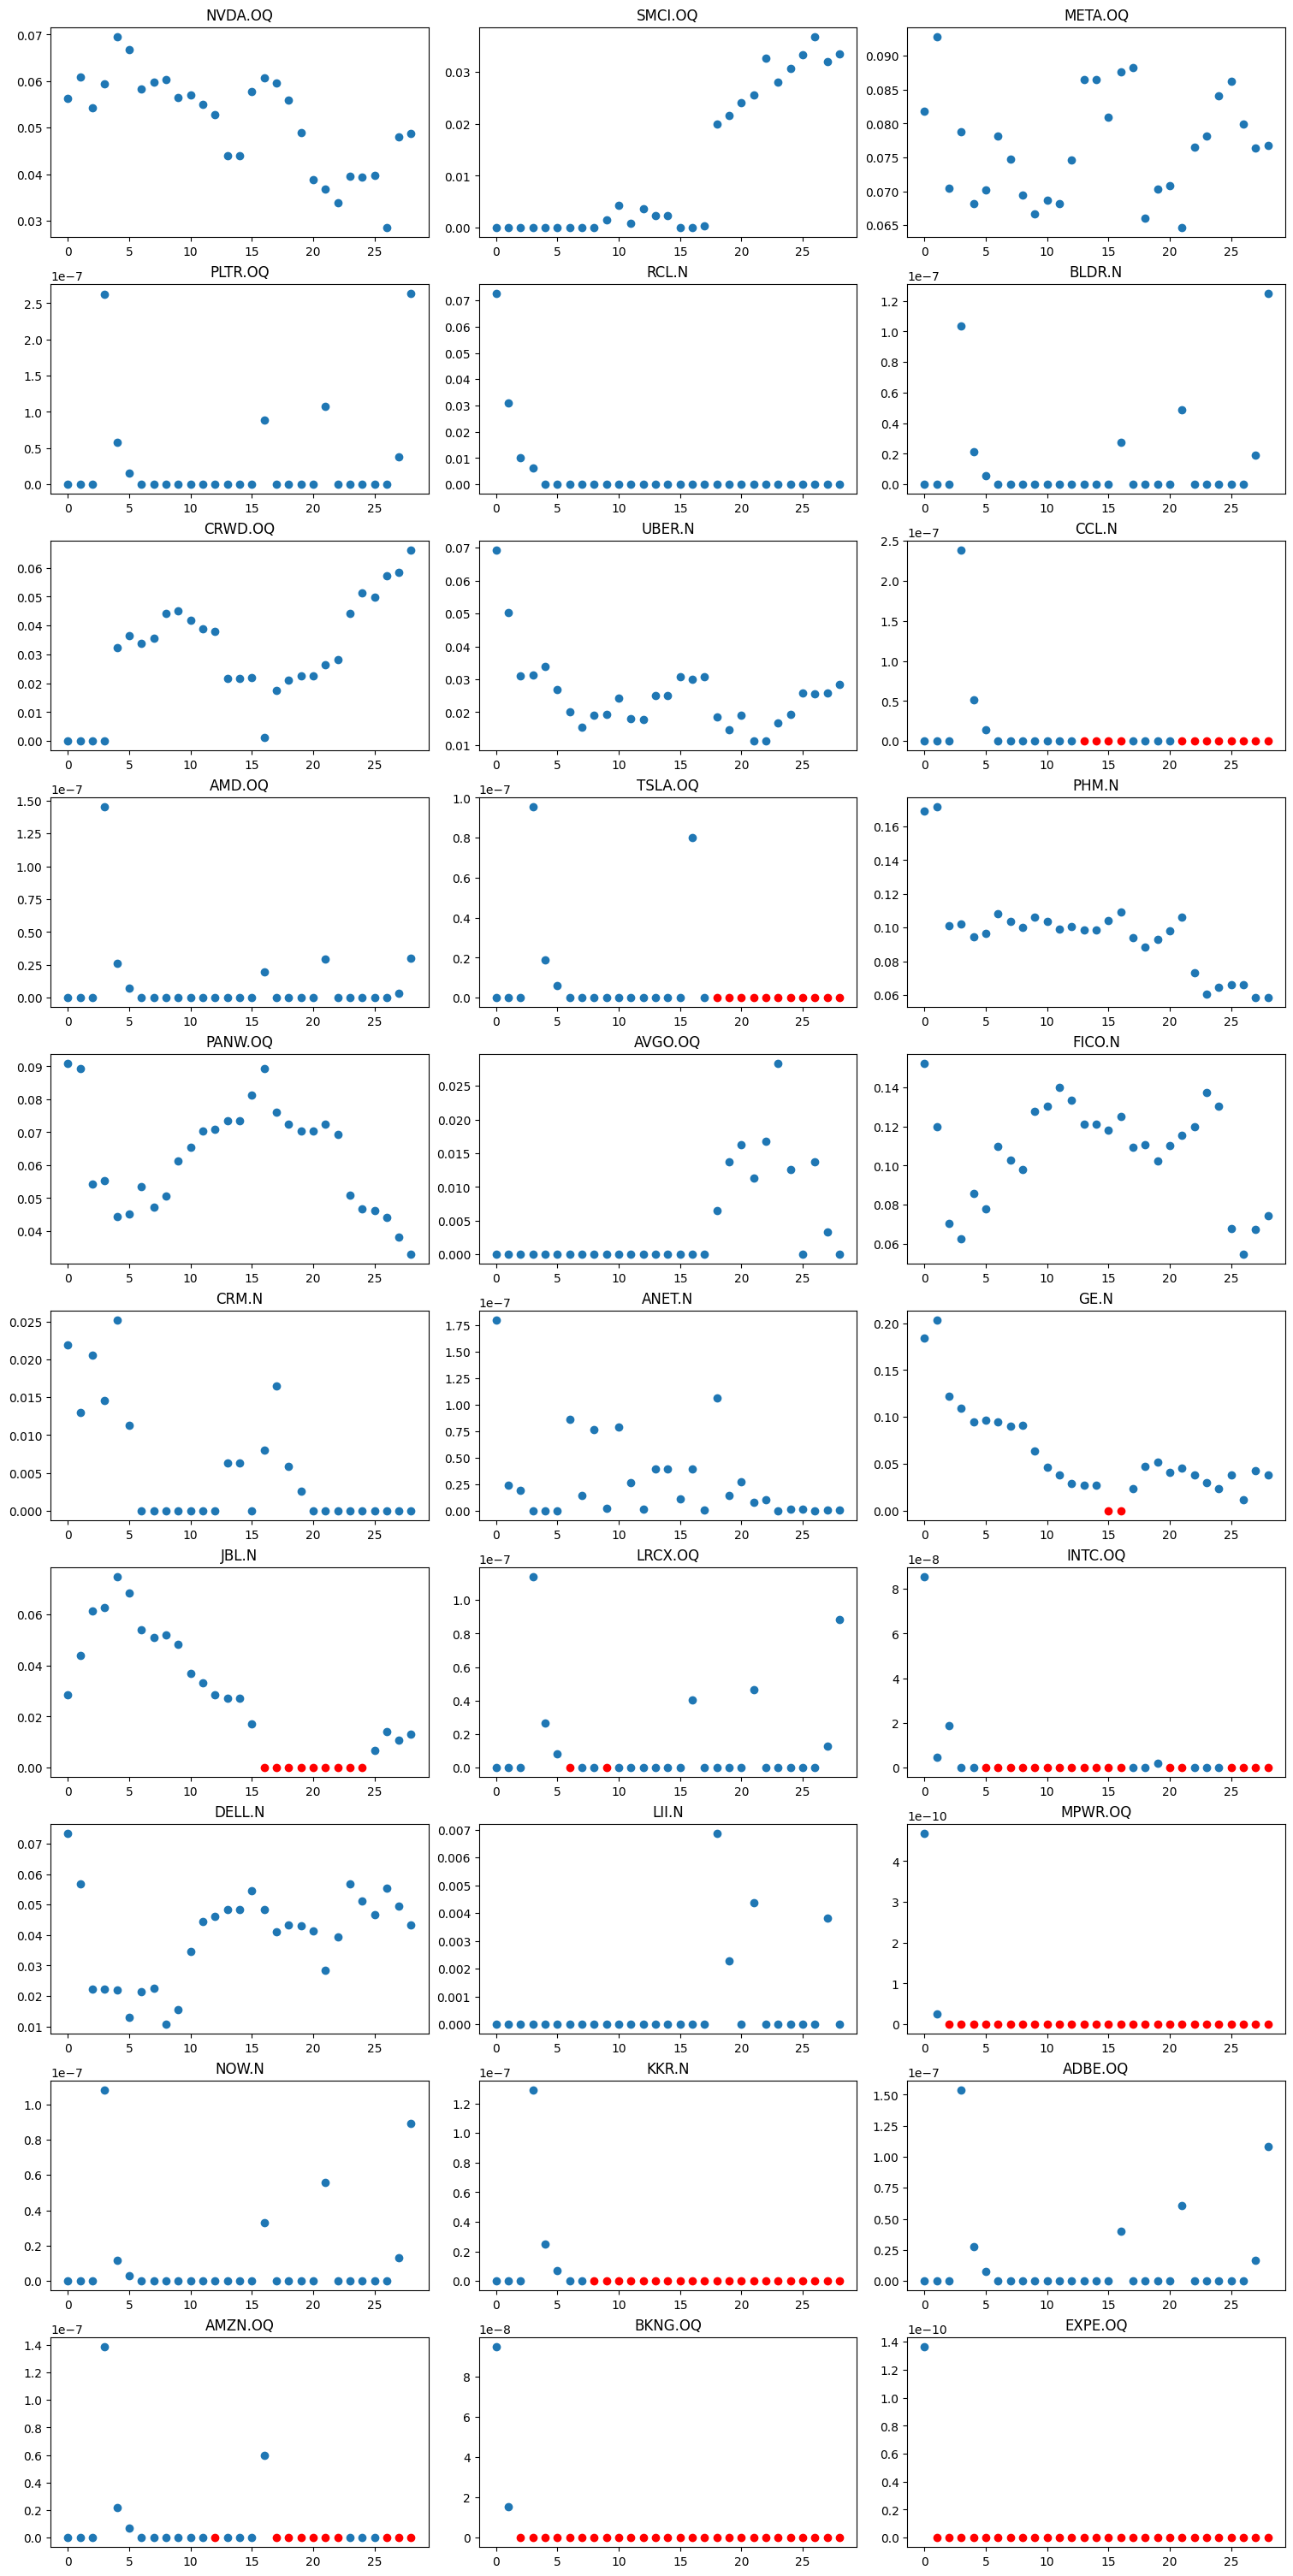

In [9]:
fig, axs = plt.subplots(10, 3, layout="constrained")
fig.set_size_inches(15, 30)

for idx in range(len(stocks[0])):

    ticker = stocks[0][idx]
    axs[idx//3, idx%3].set_title(ticker)

    weight = []
    in_indices = []
    out_indices = []

    for idx2, top_n in enumerate(stocks):
        if ticker in top_n:
            weight.append(weights[idx2][list(top_n).index(ticker)])
            in_indices.append(idx2)
        else:
            out_indices.append(idx2)

    axs[idx//3, idx%3].plot(in_indices, weight, "o")
    axs[idx//3, idx%3].plot(out_indices, [0]*len(out_indices), "o", c="red")

plt.show()